<a href="https://colab.research.google.com/github/flora0110/sentence_prediction/blob/main/Extraction_based_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# input data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json

with open('/content/drive/MyDrive/senior/LAB/LawCaseRetreiver/sentence_predict/dataset_new/train_data.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

#with open('/content/drive/MyDrive/senior/LAB/LawCaseRetreiver/sentence_predict/dataset_new/test_data.json', 'r', encoding='utf-8') as f:
#    test_data = json.load(f)

In [ ]:
import json

with open('/content/drive/MyDrive/train_data.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

#with open('/content/drive/MyDrive/senior/LAB/LawCaseRetreiver/sentence_predict/dataset_new/test_data.json', 'r', encoding='utf-8') as f:
#    test_data = json.load(f)

In [3]:
def extract_key_contents(data):
    facts = []
    sentences = []
    for item in data:
        facts.append(item.get('fact'))
        sentences.append(item.get('sentance'))
    return facts, sentences

In [4]:
train_facts, train_sentences = extract_key_contents(train_data)
#test_facts, test_sentences = extract_key_contents(test_data)

# split into sentence

In [5]:
def split_into_sentences(text):
    return [sentence.strip() for sentence in text.split('。')]

In [6]:
train_facts_sentences = []
for document in train_facts:
    train_facts_sentences.append(split_into_sentences(document))

In [ ]:
test_facts_sentences = []
for document in test_facts:
    test_facts_sentences.append(split_into_sentences(document))

In [ ]:
print(len(train_facts_sentences))
print(len(train_facts_sentences[0]))
print(train_facts_sentences[0][0])
print(train_facts_sentences[0][1])

500
51
一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性
迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性


In [ ]:
print(len(test_facts_sentences))
print(len(test_facts_sentences[0]))
print(test_facts_sentences[0][0])
print(test_facts_sentences[0][1])

100
49
○、緣徐鴻光（所涉行使偽造私文書犯行，業經本院以95年度訴字第955號判決處有期徒刑3月、緩刑3年確定）因需款使用，知悉穆立明有借款管道，為求順利借款，2人竟共同意圖為自己不法所有，基於行使偽造私文書及詐欺取財之犯意聯絡，知悉車牌號碼00-000號營業小客車係徐鴻光向志朗交通有限公司（下稱志朗公司）租賃之車輛，竟由穆立明先於不詳時間、不詳地點，偽刻「志朗交通有限公司」及負責人「陳健志」印章（正確姓名為陳建志，誤刻為「陳健志」）各1枚，並偽造「陳健志」代表志朗公司與徐鴻光簽署之「臺北市計程車客運駕駛人自備車輛參與經營契約書」（下稱本案參與經營契約書），虛偽記載徐鴻光提供上述營業小客車靠行志朗公司營業等不實內容，並持上開偽刻印章，偽造「志朗交通有限公司」印文4枚、「陳健志」印文6枚於本案參與經營契約書上，再於92年3月6日交徐鴻光於立約人乙方欄簽名，2人復於同日協同不知情之徐鴻光配偶徐樂仁（所涉行使偽造私文書犯行，業經本院以95年度訴字第955號判決無罪確定），前往臺北市○○區○○街00巷0號2樓王傑生所經營之宏帝當舖（現更名為渣打當舖），由徐鴻光、穆立明交付偽造本案參與經營契約書向宏帝當鋪借款新臺幣（下同）10萬元以為行使，並約定由徐樂仁擔任連帶保證人，王傑生誤信上開車輛為徐鴻光所有而陷入錯誤，於扣除利息後交付9萬1千元借款予徐鴻光夫婦，足以生損害於志朗公司、陳建志、王傑生
嗣因徐鴻光僅清償每期7千元之分期款共11期計7萬7千元，未全額清償即無力負擔債務，王傑生始查知上開車輛非徐鴻光所有，而悉上情


In [ ]:
train_fact_sentence_num = []
test_fact_sentence_num = []

for data in train_facts_sentences:
  train_fact_sentence_num.append(len(data))

for data in test_facts_sentences:
  test_fact_sentence_num.append(len(data))


In [ ]:
print("===Train Dataset===")
print("Length: ", len(train_fact_sentence_num))
print("Max Length: ", max(train_fact_sentence_num))
print("Min Length: ", min(train_fact_sentence_num))
print("Avg. Length: ", sum(train_fact_sentence_num) / len(train_fact_sentence_num))

print("===Test Dataset===")
print("Length: ", len(test_fact_sentence_num))
print("Max Length: ", max(test_fact_sentence_num))
print("Min Length: ", min(test_fact_sentence_num))
print("Avg. Length: ", sum(test_fact_sentence_num) / len(test_fact_sentence_num))

===Train Dataset===
Length:  500
Max Length:  191
Min Length:  7
Avg. Length:  58.688
===Test Dataset===
Length:  100
Max Length:  182
Min Length:  7
Avg. Length:  59.51


In [ ]:
train_fact_sentence_len = []
test_fact_sentence_len = []

for fact in train_facts_sentences:
  for sentence in fact:
    train_fact_sentence_len.append(len(sentence))

for fact in test_facts_sentences:
  for sentence in fact:
    test_fact_sentence_len.append(len(sentence))

In [ ]:
print("===Train Dataset===")
print("Length: ", len(train_fact_sentence_len))
print("Max Length: ", max(train_fact_sentence_len))
print("Min Length: ", min(train_fact_sentence_len))
print("Avg. Length: ", sum(train_fact_sentence_len) / len(train_fact_sentence_len))

print("===Test Dataset===")
print("Length: ", len(test_fact_sentence_len))
print("Max Length: ", max(test_fact_sentence_len))
print("Min Length: ", min(test_fact_sentence_len))
print("Avg. Length: ", sum(test_fact_sentence_len) / len(test_fact_sentence_len))

===Train Dataset===
Length:  29344
Max Length:  5193
Min Length:  0
Avg. Length:  134.20065430752453
===Test Dataset===
Length:  5951
Max Length:  2464
Min Length:  0
Avg. Length:  137.34011090573014


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_distribution(data):
    bin_width = 500
    plt.hist(data, bins=10, edgecolor='black')
    plt.title('Distribution Plot')
    plt.xticks(range(min(data), max(data) + bin_width, bin_width))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)                              # 顯示網格線
    plt.show()

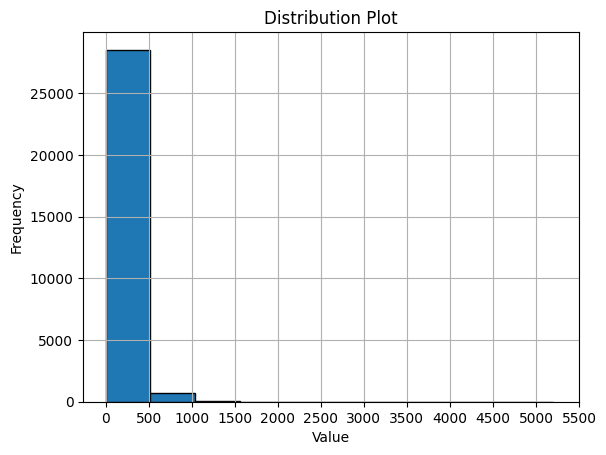

In [ ]:
plot_distribution(train_fact_sentence_len)

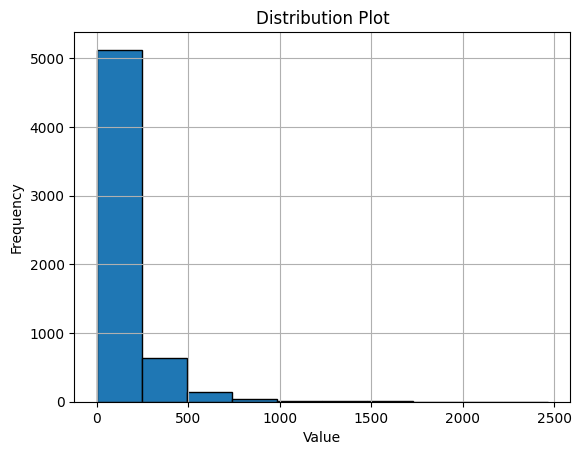

In [ ]:
plot_distribution(test_fact_sentence_len)

# breeze api

In [7]:
import requests
import json

url = "https://nlplab-llm.nlpnchu.org/generate"

headers = {
  'Content-Type': 'application/json',
  'accept': 'application/json'
}

def get_breeze(input_content):
    system = 'You are a helpful AI assistant built by MediaTek Research. The user you are helping speaks Traditional Chinese and comes from Taiwan.'

    payload = json.dumps({
        "inputs": f"<s> {system} [INST] {input_content} [/INST]",
        "parameters": {
            "do_sample": True,
            "temperature": 0.01,
            "top_p": 0.95,
            # "frequency_penalty": 0.01,
            # "presence_penalty": 0.05,
            #'repetition_penalty': 1.2, # 不要一直生重複的
            'max_new_tokens':1000, # 要設一下，不然會講到一半就停掉
        }
        })
    headers = {
    'Content-Type': 'application/json',
    'accept': 'application/json'
    }
    try:
        response = requests.request("POST", url, headers=headers, data=payload)
        j_result=json.loads(response.text)
        if "generated_text" in j_result.keys():
            return j_result['generated_text']
        else:
            return j_result
    except Exception as e:
        print(e)

# prompt測試
交換句子順序測試是不是只會抓前三個

In [ ]:
prompt1 = "1: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云\n2: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁）\n3: 上開事實，首堪認定\n4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力\n5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力\n6: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性\n7: 經查：(一)被告於93年4月3日前往泰國，並於同年月7日與共犯陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，被告即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市戶政事務所填寫結婚登記申請書，申請辦理其與共犯陳玉婉之結婚登記，並取得戶籍謄本\n8: 迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性\n9:  二、案經臺南市警察局（現改制為臺南市政府警察局，以下沿用舊制稱謂）第一分局報告臺灣臺南地方法院檢察署檢察官偵查起訴\n10: (二)共犯詹巧薇、張晉源等人當時欲找臺灣人與泰國女子結婚，由共犯林清水於報紙上刊登徵人廣告，若應徵者符合與泰國人結婚之條件，便將應徵者介紹予共犯詹巧薇、張晉源等人，共犯林清水可從中獲取1萬元之仲介費，適被告依前開徵人廣告應徵，共犯林清水衡量其條件後告知其可至泰國結婚，其除不用負擔前往泰國之機票及食宿費用外，尚可獲取5至6萬元之報酬，被告應允同意後，共犯林清水將其介紹予詹巧薇、張晉源等人，被告即依指示前往泰國與為了來臺工作且無結婚真意的共犯陳玉婉辦理結婚事宜等情，業據共犯林清水於警詢時證稱：伊登報徵人到泰國結婚，被告看報紙來的，伊便轉介予共犯詹巧薇，由共犯詹巧薇安排後續到泰國結婚之事宜，被告除不用負擔前往泰國機票、食宿等費用，尚可獲取約5至6萬元酬勞，伊則可自共犯詹巧薇獲取約1萬元之仲介費用；伊只有將被告轉介予共犯詹巧薇，並未參與後續被告前往泰國之證照、機票、食宿等相關事宜；被告係因缺錢，為了賺取擔任人頭配偶的佣金5至6萬，並不是真的要與泰國人結婚，共犯陳玉婉係為了來臺灣工作賺錢，亦不是真的要與臺灣人結婚等語（見警三卷第2至3頁）；並於本院審理時具結證稱：當初共犯詹巧薇、張晉源等人欲找男子前往泰國結婚，伊曾刊登「男、女不限、經驗不拘」等內容之徵人廣告，被告見報應徵時，被告係因缺錢才來找伊，伊衡量被告條件後認為其只能利用結婚賺取報酬，伊才向其表示是要辦結婚，伊告知被告可安排其去泰國結婚，其不用負擔食宿及機票等費用，可實拿5至6萬元的報酬，被告同意後，伊將被告介紹予共犯詹巧薇、張晉源，共犯張晉源給付佣金1萬元予伊；伊與被告談論泰國結婚事宜時，伊與被告均不知被告之結婚對象為何人，伊亦未見過與被告結婚之泰國女子，伊僅介紹被告予共犯詹巧薇、張晉源等人，伊並未參予後續之泰國結婚、辦理結婚登記及居留申請等事情；被告曾給伊一部機車，當時被告表示要去別的地方，機車留在臺南無人使用，伊修理使用一段期間後，因再度壞掉便未再使用等語（見本院卷第68頁背面至71頁）"

In [ ]:
prompt2 = "1: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性 \n2: 迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性 \n3: 二、案經臺南市警察局（現改制為臺南市政府警察局，以下沿用舊制稱謂）第一分局報告臺灣臺南地方法院檢察署檢察官偵查起訴 \n4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力 \n5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力 \n6: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云 \n7: 經查：(一)被告於93年4月3日前往泰國，並於同年月7日與共犯陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，被告即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市戶政事務所填寫結婚登記申請書，申請辦理其與共犯陳玉婉之結婚登記，並取得戶籍謄本 \n8: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁） \n9: 上開事實，首堪認定 \n10: (二)共犯詹巧薇、張晉源等人當時欲找臺灣人與泰國女子結婚，由共犯林清水於報紙上刊登徵人廣告，若應徵者符合與泰國人結婚之條件，便將應徵者介紹予共犯詹巧薇、張晉源等人，共犯林清水可從中獲取1萬元之仲介費，適被告依前開徵人廣告應徵，共犯林清水衡量其條件後告知其可至泰國結婚，其除不用負擔前往泰國之機票及食宿費用外，尚可獲取5至6萬元之報酬，被告應允同意後，共犯林清水將其介紹予詹巧薇、張晉源等人，被告即依指示前往泰國與為了來臺工作且無結婚真意的共犯陳玉婉辦理結婚事宜等情，業據共犯林清水於警詢時證稱：伊登報徵人到泰國結婚，被告看報紙來的，伊便轉介予共犯詹巧薇，由共犯詹巧薇安排後續到泰國結婚之事宜，被告除不用負擔前往泰國機票、食宿等費用，尚可獲取約5至6萬元酬勞，伊則可自共犯詹巧薇獲取約1萬元之仲介費用；伊只有將被告轉介予共犯詹巧薇，並未參與後續被告前往泰國之證照、機票、食宿等相關事宜；被告係因缺錢，為了賺取擔任人頭配偶的佣金5至6萬，並不是真的要與泰國人結婚，共犯陳玉婉係為了來臺灣工作賺錢，亦不是真的要與臺灣人結婚等語（見警三卷第2至3頁）；並於本院審理時具結證稱：當初共犯詹巧薇、張晉源等人欲找男子前往泰國結婚，伊曾刊登「男、女不限、經驗不拘」等內容之徵人廣告，被告見報應徵時，被告係因缺錢才來找伊，伊衡量被告條件後認為其只能利用結婚賺取報酬，伊才向其表示是要辦結婚，伊告知被告可安排其去泰國結婚，其不用負擔食宿及機票等費用，可實拿5至6萬元的報酬，被告同意後，伊將被告介紹予共犯詹巧薇、張晉源，共犯張晉源給付佣金1萬元予伊；伊與被告談論泰國結婚事宜時，伊與被告均不知被告之結婚對象為何人，伊亦未見過與被告結婚之泰國女子，伊僅介紹被告予共犯詹巧薇、張晉源等人，伊並未參予後續之泰國結婚、辦理結婚登記及居留申請等事情；被告曾給伊一部機車，當時被告表示要去別的地方，機車留在臺南無人使用，伊修理使用一段期間後，因再度壞掉便未再使用等語（見本院卷第68頁背面至71頁）"

In [ ]:
prompt3 = "1: (二)共犯詹巧薇、張晉源等人當時欲找臺灣人與泰國女子結婚，由共犯林清水於報紙上刊登徵人廣告，若應徵者符合與泰國人結婚之條件，便將應徵者介紹予共犯詹巧薇、張晉源等人，共犯林清水可從中獲取1萬元之仲介費，適被告依前開徵人廣告應徵，共犯林清水衡量其條件後告知其可至泰國結婚，其除不用負擔前往泰國之機票及食宿費用外，尚可獲取5至6萬元之報酬，被告應允同意後，共犯林清水將其介紹予詹巧薇、張晉源等人，被告即依指示前往泰國與為了來臺工作且無結婚真意的共犯陳玉婉辦理結婚事宜等情，業據共犯林清水於警詢時證稱：伊登報徵人到泰國結婚，被告看報紙來的，伊便轉介予共犯詹巧薇，由共犯詹巧薇安排後續到泰國結婚之事宜，被告除不用負擔前往泰國機票、食宿等費用，尚可獲取約5至6萬元酬勞，伊則可自共犯詹巧薇獲取約1萬元之仲介費用；伊只有將被告轉介予共犯詹巧薇，並未參與後續被告前往泰國之證照、機票、食宿等相關事宜；被告係因缺錢，為了賺取擔任人頭配偶的佣金5至6萬，並不是真的要與泰國人結婚，共犯陳玉婉係為了來臺灣工作賺錢，亦不是真的要與臺灣人結婚等語（見警三卷第2至3頁）；並於本院審理時具結證稱：當初共犯詹巧薇、張晉源等人欲找男子前往泰國結婚，伊曾刊登「男、女不限、經驗不拘」等內容之徵人廣告，被告見報應徵時，被告係因缺錢才來找伊，伊衡量被告條件後認為其只能利用結婚賺取報酬，伊才向其表示是要辦結婚，伊告知被告可安排其去泰國結婚，其不用負擔食宿及機票等費用，可實拿5至6萬元的報酬，被告同意後，伊將被告介紹予共犯詹巧薇、張晉源，共犯張晉源給付佣金1萬元予伊；伊與被告談論泰國結婚事宜時，伊與被告均不知被告之結婚對象為何人，伊亦未見過與被告結婚之泰國女子，伊僅介紹被告予共犯詹巧薇、張晉源等人，伊並未參予後續之泰國結婚、辦理結婚登記及居留申請等事情；被告曾給伊一部機車，當時被告表示要去別的地方，機車留在臺南無人使用，伊修理使用一段期間後，因再度壞掉便未再使用等語（見本院卷第68頁背面至71頁） \n2: 迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性 \n3: 二、案經臺南市警察局（現改制為臺南市政府警察局，以下沿用舊制稱謂）第一分局報告臺灣臺南地方法院檢察署檢察官偵查起訴 \n4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力 \n5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力 \n6: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云 \n7: 經查：(一)被告於93年4月3日前往泰國，並於同年月7日與共犯陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，被告即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市戶政事務所填寫結婚登記申請書，申請辦理其與共犯陳玉婉之結婚登記，並取得戶籍謄本 \n8: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁） \n9: 上開事實，首堪認定 \n10: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性"

In [ ]:
print(prompt1)

1: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云
2: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁）
3: 上開事實，首堪認定
4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力
5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力
6: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，

In [ ]:
print(prompt2)

1: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性 
2: 迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性 
3: 二、案經臺南市警察局（現改制為臺南市政府警察局，以下沿用舊制稱謂）第一分局報告臺灣臺南地方法院檢察署檢察官偵查起訴 
4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又

In [ ]:
print(prompt3)

1: (二)共犯詹巧薇、張晉源等人當時欲找臺灣人與泰國女子結婚，由共犯林清水於報紙上刊登徵人廣告，若應徵者符合與泰國人結婚之條件，便將應徵者介紹予共犯詹巧薇、張晉源等人，共犯林清水可從中獲取1萬元之仲介費，適被告依前開徵人廣告應徵，共犯林清水衡量其條件後告知其可至泰國結婚，其除不用負擔前往泰國之機票及食宿費用外，尚可獲取5至6萬元之報酬，被告應允同意後，共犯林清水將其介紹予詹巧薇、張晉源等人，被告即依指示前往泰國與為了來臺工作且無結婚真意的共犯陳玉婉辦理結婚事宜等情，業據共犯林清水於警詢時證稱：伊登報徵人到泰國結婚，被告看報紙來的，伊便轉介予共犯詹巧薇，由共犯詹巧薇安排後續到泰國結婚之事宜，被告除不用負擔前往泰國機票、食宿等費用，尚可獲取約5至6萬元酬勞，伊則可自共犯詹巧薇獲取約1萬元之仲介費用；伊只有將被告轉介予共犯詹巧薇，並未參與後續被告前往泰國之證照、機票、食宿等相關事宜；被告係因缺錢，為了賺取擔任人頭配偶的佣金5至6萬，並不是真的要與泰國人結婚，共犯陳玉婉係為了來臺灣工作賺錢，亦不是真的要與臺灣人結婚等語（見警三卷第2至3頁）；並於本院審理時具結證稱：當初共犯詹巧薇、張晉源等人欲找男子前往泰國結婚，伊曾刊登「男、女不限、經驗不拘」等內容之徵人廣告，被告見報應徵時，被告係因缺錢才來找伊，伊衡量被告條件後認為其只能利用結婚賺取報酬，伊才向其表示是要辦結婚，伊告知被告可安排其去泰國結婚，其不用負擔食宿及機票等費用，可實拿5至6萬元的報酬，被告同意後，伊將被告介紹予共犯詹巧薇、張晉源，共犯張晉源給付佣金1萬元予伊；伊與被告談論泰國結婚事宜時，伊與被告均不知被告之結婚對象為何人，伊亦未見過與被告結婚之泰國女子，伊僅介紹被告予共犯詹巧薇、張晉源等人，伊並未參予後續之泰國結婚、辦理結婚登記及居留申請等事情；被告曾給伊一部機車，當時被告表示要去別的地方，機車留在臺南無人使用，伊修理使用一段期間後，因再度壞掉便未再使用等語（見本院卷第68頁背面至71頁） 
2: 迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居

## 給範例
結果：只會印出範例句子，已經測試過長度在5000內也一樣

In [ ]:
input_ex = "1: 一、李炷烽曾為金門縣縣長，與李運成為叔姪關係 \n2: 李炷烽與李運成、李根福3人於民國95年間，共同繼承金門縣金寧鄉○○○○○段000號土地（下稱系爭土地），渠等之應有部分均為三分之一 \n3: 李炷烽明知李運成並未同意贈與上開土地之應有部分予社團法人金門縣李氏宗親會（下稱李氏宗親會），竟於102年5月間某日，撥打電話予李運成佯稱：因系爭土地與鄰近土地所有權人界線劃分不清，故需身分證及印章辦理並解決云云，李運成不疑有他，即將身分證及印鑑章寄送李炷烽 \n4: 李炷烽即基於行使偽造私文書及使公務員登載不實之犯意，指示不知情之地政士李根遠於103年3月3日前某日，在「土地登記申請書」、「土地所有權贈與移轉契約書」、「切結書」、「不動產贈與契約」等文件上，接續盜蓋李運成之印章後，復將其中之「土地登記申請書」、「土地所有權贈與移轉契約書」、「切結書」（起訴書誤繕連同「不動產贈與契約」送件至金門縣地政局，應予更正）連同印鑑證明、契稅繳款證明及土地增值稅繳款證明等文件，於103年3月3日送件至金門縣地政局，表示李運成願贈與系爭土地之應有部分，致不知情之承辦公務員為形式審查後，將上開不實事項登載在職務上所掌之地籍簿冊等公文書內，並於103年4月7日移轉登記至李氏宗親會名下，足生損害於地政機關對於地籍管理正確性及李運成 \n5: 嗣辦理完成後，李炷烽將系爭土地所有權狀及「不動產贈與契約」寄送李運成，欲使李運成接受系爭土地已贈與之事實，惟李運成心有不甘，乃提出告訴 \n6: 二、案經李運成訴由臺灣士林地方法院檢察署察官呈請臺灣高等法院檢察署檢察長函轉最高法院檢察署移轉福建金門地方法院檢察署檢察官偵查後起訴 \n7: 理由一、證據能力之說明：(一)按被告以外之人於偵查中向檢察官所為之陳述，除顯有不可信之情況者外，得為證據，刑事訴訟法第159條之1第2項定有明文 \n8: 該規定揭示被告以外之人於偵查中向檢察官所為之陳述，原則上有證據能力，僅於顯有不可信之情況，始例外否定其得為證據 \n9: 換言之，法院僅在被告主張並釋明有「不可信之情況」時，始應就有無該例外情形為調查審認 \n10: 本院審酌，證人李運成、李根福、李錫榮及李根遠等人於偵查時之證述，並無受到外力干擾，依其等陳述時之外在環境及情況，並無任何顯不可信之情形，且俱經依法具結"

In [ ]:
output_ex = "3: 李炷烽明知李運成並未同意贈與上開土地之應有部分予社團法人金門縣李氏宗親會（下稱李氏宗親會），竟於102年5月間某日，撥打電話予李運成佯稱：因系爭土地與鄰近土地所有權人界線劃分不清，故需身分證及印章辦理並解決云云，李運成不疑有他，即將身分證及印鑑章寄送李炷烽 \n4: 李炷烽即基於行使偽造私文書及使公務員登載不實之犯意，指示不知情之地政士李根遠於103年3月3日前某日，在「土地登記申請書」、「土地所有權贈與移轉契約書」、「切結書」、「不動產贈與契約」等文件上，接續盜蓋李運成之印章後，復將其中之「土地登記申請書」、「土地所有權贈與移轉契約書」、「切結書」（起訴書誤繕連同「不動產贈與契約」送件至金門縣地政局，應予更正）連同印鑑證明、契稅繳款證明及土地增值稅繳款證明等文件，於103年3月3日送件至金門縣地政局，表示李運成願贈與系爭土地之應有部分，致不知情之承辦公務員為形式審查後，將上開不實事項登載在職務上所掌之地籍簿冊等公文書內，並於103年4月7日移轉登記至李氏宗親會名下，足生損害於地政機關對於地籍管理正確性及李運成 \n5: 嗣辦理完成後，李炷烽將系爭土地所有權狀及「不動產贈與契約」寄送李運成，欲使李運成接受系爭土地已贈與之事實，惟李運成心有不甘，乃提出告訴"

In [ ]:
query = "以下句子都是來自一篇法律判決書，請從這些句子中挑選出和犯罪事實情節描述最相關的三個句子。以下是一個Extraction-based摘要範例：多個句子輸入"+input_ex+" 三個句子輸出："+output_ex+"根據以上的範例，從著些句字中萃取出和犯罪事實情節描述最相關的三個句子，句子如下："

In [ ]:
print(prompt1)
print("--->")
print(get_breeze(query+prompt1))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt2))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt3))
print("=======================================================")

1: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云
2: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁）
3: 上開事實，首堪認定
4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力
5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力
6: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，

In [ ]:
query = "以下句子都是來自一篇法律判決書，請從這些句子中挑選出和犯罪事實情節描述最相關的三個句子。以下是一個Extraction-based摘要範例：多個句子輸入"+input_ex+" 萃取出和犯罪事實情節描述最相關的三個句子輸出："+output_ex+"\n根據以上的範例，從以下句子中萃取出和犯罪事實情節描述最相關的三個句子，句子如下："

In [ ]:
print(prompt1)
print("--->")
print(get_breeze(query+prompt1))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt2))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt3))
print("=======================================================")

1: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云
2: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁）
3: 上開事實，首堪認定
4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力
5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力
6: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，

In [ ]:
query = "以下句子都是來自一篇法律判決書，請從這些句子中挑選出和犯罪事實情節描述最相關的三個句子。以下是一個萃取句子的範例：多個句子輸入"+input_ex+" 萃取出和犯罪事實情節描述最相關的三個句子輸出："+output_ex+"\n根據以上的範例，從以下句子中萃取出和犯罪事實情節描述最相關的三個句子，句子如下："

In [ ]:
print(prompt1)
print("--->")
print(get_breeze(query+prompt1))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt2))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt3))
print("=======================================================")

In [ ]:
len(query+prompt1)

4423

In [ ]:
query = "我會給你來自一篇法律判決書的多個句子，請從這些句子中挑選出和犯罪事實情節描述最相關的三個句子。以下是一個萃取句子的範例：多個句子輸入"+input_ex+" 萃取出和犯罪事實情節描述最相關的三個句子輸出："+output_ex+"\n根據以上的範例，從以下句子中萃取出和犯罪事實情節描述最相關的三個句子，句子如下："

In [ ]:
print(prompt1)
print("--->")
print(get_breeze(query+prompt1))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt2))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt3))
print("=======================================================")

1: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云
2: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁）
3: 上開事實，首堪認定
4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力
5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力
6: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，

In [ ]:
query = "我會給你來自一篇法律判決書的多個句子，請從這些句子中挑選出和犯罪事實情節描述最相關的三個句子。以下是一個挑選句子的範例：多個句子輸入"+input_ex+" 從輸入挑選出和犯罪事實情節描述最相關的三個句子輸出："+output_ex+"\n根據以上的範例，從以下句子中萃取出和犯罪事實情節描述最相關的三個句子，句子如下："

In [ ]:
print(prompt1)
print("--->")
print(get_breeze(query+prompt1))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt2))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt3))
print("=======================================================")

1: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云
2: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁）
3: 上開事實，首堪認定
4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力
5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力
6: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，

## 在敘述中加入說要做Extraction-based summarization有助於不要只抓前三個句子

In [ ]:
query = "我想請你幫我對一篇判決書做Extraction-based summarization，我已經將這篇判決書切成多個句子，請幫我從這些句子中挑選出和犯罪事實情節描述最相關的三個句子。句子如下：\n"

In [ ]:
print(prompt1)
print("--->")
print(get_breeze(query+prompt1))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt2))
print("=======================================================")
print(prompt1)
print("--->")
print(get_breeze(query+prompt3))
print("=======================================================")

1: 乙、實體方面：一、訊據被告固坦承於上開時、地，透過共犯林清水之介紹，先至泰國辦理與共犯陳玉婉之結婚手續，再前往臺南縣永康市戶政事務所辦理結婚登記，又前往臺南縣政府警察局外事課辦理共犯陳玉婉之外僑居留證及申請居留證延期之事實，惟矢口否認有何行使使公務員登載不實文書情事，於本院審理時辯稱：伊當時經濟狀況良好，因同居女友欲去日本工作而不願結婚，然伊希望結婚生子，遂透過共犯林清水之介紹與安排，共犯林清水先讓伊看過共犯陳玉婉之照片，伊再前往泰國與共犯陳玉婉結婚，伊僅負擔自己的來回機票錢及泰國住宿費用，其他結婚費用均由共犯林清水負擔，伊則贈送伊的一部機車予共犯林清水以為回報，伊並不認識共犯詹巧薇云云
2: 迨共犯陳玉婉來臺後，為取得居留身分，被告與共犯陳玉婉於同年6月14日及94年5月5日，均持前開戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發共犯陳玉婉之外僑居留證及申請居留證延期等情，業據被告供承在卷，並有結婚登記申請書、授權書各1份、結婚登記書、結婚證書各1份（含中文、泰文影本及我國駐泰國臺北經濟文化辦事處認證之資料）、93年6月14日及94年5月5日之外國人居留停留案件聲請表各1份、被告及共犯陳玉婉之入出國日期紀錄各1份、共犯陳玉婉之外僑居留資料查詢1份在卷可按（見警三卷即南市警一刑偵字第0994101517號卷第6至24、33頁）
3: 上開事實，首堪認定
4: 理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本院審酌前開證據作成時之情況及證據取得過程等節，並無非出於任意性、不正取供或其他違法不當情事，且客觀上亦無顯不可信之情況，堪認為適當，是依刑事訴訟法第159條之5規定，均有證據能力
5: 二、卷附之被告及陳玉婉入出國日期紀錄各1份等書證，均非屬供述證據，皆無傳聞法則之適用，復均無違反法定程序取得之情形，依刑事訴訟法第158條之4規定之反面解釋，均應有證據能力
6: 一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，

# summarize

In [8]:
query = "我想請你幫我對一篇判決書做Extraction-based summarization，我已經將這篇判決書切成多個句子，請幫我從以下句子中挑選出和犯罪事實情節最相關的3個句子。\n"

In [9]:
def generate_prompt(query, facts):
  for i, fact in enumerate(facts):
    query = query + f'{i+1}: {fact}\n'
  return query

In [10]:
def remove_prefix_and_colon(text):
    lines = text.strip().split('\n')
    processed_lines = []
    for line in lines:
        processed_line = line.split(':')[-1].strip()
        processed_lines.append(processed_line)
    return processed_lines

In [11]:
def extract_sentences(query, sentences):
    # print(generate_prompt(query, sentences))
    ans = get_breeze(generate_prompt(query, sentences))
    # print(ans)
    # print("========================================")
    return remove_prefix_and_colon(ans)

In [ ]:
result = extract_sentences(query, train_facts_sentences[0][:10])

 1. 被告明知與泰國籍女子陳玉婉（JARUWANWONGPRATOOM）間並無結婚之真意，仍與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，辦理假結婚手續。
2. 被告與陳玉婉在泰國辦理結婚手續後，返回臺灣辦理結婚登記，使承辦公務員陷於錯誤，登載不實事項於戶籍登記資料內，核發戶籍謄本。
3. 陳玉婉來臺後，為取得居留身分，被告與她共同向臺南縣政府警察局外事課申請核發居留證及延期，承辦人員實質審查結果未發覺假結婚，而核發居留證或核准延期。


In [ ]:
result

['1. 被告明知與泰國籍女子陳玉婉（JARUWANWONGPRATOOM）間並無結婚之真意，仍與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，辦理假結婚手續。',
 '2. 被告與陳玉婉在泰國辦理結婚手續後，返回臺灣辦理結婚登記，使承辦公務員陷於錯誤，登載不實事項於戶籍登記資料內，核發戶籍謄本。',
 '3. 陳玉婉來臺後，為取得居留身分，被告與她共同向臺南縣政府警察局外事課申請核發居留證及延期，承辦人員實質審查結果未發覺假結婚，而核發居留證或核准延期。']

In [ ]:
def generate_summary(query, facts_sentences):
    summaries = []
    for fact_sentences in facts_sentences:
        extracted_sentences = []
        for i in range(0, len(fact_sentences), 10):  # 每次处理10个句子
            sentences_subset = fact_sentences[i:i+10]
            extracted_subset = extract_sentences(query, sentences_subset)
            extracted_sentences.extend(extracted_subset)
        final_summary = extract_sentences(query, extracted_sentences)
        summaries.append(final_summary)
    return summaries

## 前三個印出來看看

In [ ]:
summaries = generate_summary(query, test_facts_sentences[:3])

我想請你幫我對一篇判決書做Extraction-based summarization，我已經將這篇判決書切成多個句子，請幫我從以下句子中挑選出和犯罪事實情節最相關的3個句子。
1: ○、緣徐鴻光（所涉行使偽造私文書犯行，業經本院以95年度訴字第955號判決處有期徒刑3月、緩刑3年確定）因需款使用，知悉穆立明有借款管道，為求順利借款，2人竟共同意圖為自己不法所有，基於行使偽造私文書及詐欺取財之犯意聯絡，知悉車牌號碼00-000號營業小客車係徐鴻光向志朗交通有限公司（下稱志朗公司）租賃之車輛，竟由穆立明先於不詳時間、不詳地點，偽刻「志朗交通有限公司」及負責人「陳健志」印章（正確姓名為陳建志，誤刻為「陳健志」）各1枚，並偽造「陳健志」代表志朗公司與徐鴻光簽署之「臺北市計程車客運駕駛人自備車輛參與經營契約書」（下稱本案參與經營契約書），虛偽記載徐鴻光提供上述營業小客車靠行志朗公司營業等不實內容，並持上開偽刻印章，偽造「志朗交通有限公司」印文4枚、「陳健志」印文6枚於本案參與經營契約書上，再於92年3月6日交徐鴻光於立約人乙方欄簽名，2人復於同日協同不知情之徐鴻光配偶徐樂仁（所涉行使偽造私文書犯行，業經本院以95年度訴字第955號判決無罪確定），前往臺北市○○區○○街00巷0號2樓王傑生所經營之宏帝當舖（現更名為渣打當舖），由徐鴻光、穆立明交付偽造本案參與經營契約書向宏帝當鋪借款新臺幣（下同）10萬元以為行使，並約定由徐樂仁擔任連帶保證人，王傑生誤信上開車輛為徐鴻光所有而陷入錯誤，於扣除利息後交付9萬1千元借款予徐鴻光夫婦，足以生損害於志朗公司、陳建志、王傑生
2: 嗣因徐鴻光僅清償每期7千元之分期款共11期計7萬7千元，未全額清償即無力負擔債務，王傑生始查知上開車輛非徐鴻光所有，而悉上情
3: 二、案經王傑生訴由臺灣士林地方法院檢察署檢察官偵查起訴
4: 理由○、證據能力部分：被告以外之人於審判外之言詞或書面陳述，除法律有規定者外，不得作為證據；又被告以外之人於審判外之陳述，雖不符合同法第159條之1至第159條之4之規定，但經當事人於審判程序同意作為證據，法院審酌該言詞陳述或書面陳述作成時之情況，認為適當者，亦得為證據
5: 刑事訴訟法第159條第1項及第159條之5第1項分別定有明文
6: 經查，本判決所引用之各該被告以外之人於審判外之陳述，雖屬傳聞證據，然當事人於本

In [ ]:
for fact in test_facts[:3]:
  print(fact)

○、緣徐鴻光（所涉行使偽造私文書犯行，業經本院以95年度訴字第955號判決處有期徒刑3月、緩刑3年確定）因需款使用，知悉穆立明有借款管道，為求順利借款，2人竟共同意圖為自己不法所有，基於行使偽造私文書及詐欺取財之犯意聯絡，知悉車牌號碼00-000號營業小客車係徐鴻光向志朗交通有限公司（下稱志朗公司）租賃之車輛，竟由穆立明先於不詳時間、不詳地點，偽刻「志朗交通有限公司」及負責人「陳健志」印章（正確姓名為陳建志，誤刻為「陳健志」）各1枚，並偽造「陳健志」代表志朗公司與徐鴻光簽署之「臺北市計程車客運駕駛人自備車輛參與經營契約書」（下稱本案參與經營契約書），虛偽記載徐鴻光提供上述營業小客車靠行志朗公司營業等不實內容，並持上開偽刻印章，偽造「志朗交通有限公司」印文4枚、「陳健志」印文6枚於本案參與經營契約書上，再於92年3月6日交徐鴻光於立約人乙方欄簽名，2人復於同日協同不知情之徐鴻光配偶徐樂仁（所涉行使偽造私文書犯行，業經本院以95年度訴字第955號判決無罪確定），前往臺北市○○區○○街00巷0號2樓王傑生所經營之宏帝當舖（現更名為渣打當舖），由徐鴻光、穆立明交付偽造本案參與經營契約書向宏帝當鋪借款新臺幣（下同）10萬元以為行使，並約定由徐樂仁擔任連帶保證人，王傑生誤信上開車輛為徐鴻光所有而陷入錯誤，於扣除利息後交付9萬1千元借款予徐鴻光夫婦，足以生損害於志朗公司、陳建志、王傑生。嗣因徐鴻光僅清償每期7千元之分期款共11期計7萬7千元，未全額清償即無力負擔債務，王傑生始查知上開車輛非徐鴻光所有，而悉上情。二、案經王傑生訴由臺灣士林地方法院檢察署檢察官偵查起訴。理由○、證據能力部分：被告以外之人於審判外之言詞或書面陳述，除法律有規定者外，不得作為證據；又被告以外之人於審判外之陳述，雖不符合同法第159條之1至第159條之4之規定，但經當事人於審判程序同意作為證據，法院審酌該言詞陳述或書面陳述作成時之情況，認為適當者，亦得為證據。刑事訴訟法第159條第1項及第159條之5第1項分別定有明文。經查，本判決所引用之各該被告以外之人於審判外之陳述，雖屬傳聞證據，然當事人於本院審判期日中均表示同意作為證據方法而不予爭執，且迄至言詞辯論終結前亦未再聲明異議（見本院卷第68頁至第68頁背面），本院審酌上開證據資料製作時之情況，尚無違法不當及證明力明顯過低之瑕疵，亦認為以之作為證據應屬適當，

In [ ]:
for sentence in summaries:
  print(sentence)

['徐鴻光和穆立明因需要借款，共同偽造「志朗交通有限公司」和「陳健志」的印章，以及「臺北市計程車客運駕駛人自備車輛參與經營契約書」，向宏帝當鋪借款10萬元。', '徐鴻光和穆立明偽造的契約書導致王傑生誤信車輛為徐鴻光所有，而提供借款。', '徐鴻光和穆立明被依行使偽造私文書和詐欺取財罪起訴。']
['1. 劉木卿主動與祭祀公業蕭子玉之管理人蕭賜福、蕭耀西之後代子孫聯絡處理該祭祀公業之相關事宜，經洽商結果，於蕭慶堂、蕭慶珍、蕭如壎、蕭慶三等人不需支費下，劉木卿代為申辦，事成後，由劉木卿獲得該祭祀公業所有土地價值20％之報酬。', '2. 劉木卿、蕭慶堂、蕭慶珍、蕭慶三與蕭如壎共同基於意圖為自已不法所有及行使業務上登載不實文書、使公務員登載不實之犯意聯絡，接續為下列行為：由劉木卿於民國98年8月3日前數日內某時，在彰化縣員林鎮○○路○段172之1號住處，於業務上登載祭祀公業蕭子玉「3、淵源來歷：由蕭賜福積蓄購買本公業所有坐落彰化縣田中鎮○○○段158、159地號等二筆之土地以祭田收益，作為每年清明節祭祀祖先之資，並期望子孫『蕭子』被珍惜如玉，故以『祭祀公業蕭子玉』命名」等不實沿革，及不實之「派下現員：蕭慶三、蕭慶堂、蕭慶珍、蕭如壎」名冊、不實之派下全員系統表、推舉書後，連同該祭祀公業之財產清冊、土地登記第一類謄本，書寫以蕭慶堂為申報人之祭祀公業派下全員證明書申請書，於98年8月4日由劉木卿持向彰化縣田中鎮公所申請該祭祀公業派下全員證明書而行使，使不知情之田中鎮公所民政課承辦人員誤認為所申報關於該祭祀公業之「享祀人」、「設立人」與祭祀公業財產等要件皆具備，及該祭祀公業之派下員僅有蕭慶堂、蕭慶珍、蕭慶三與蕭如壎，而將上開不實事項登載於職務上所掌之公文書，經田中鎮公所依法公告徵求異議，俟公告期滿無人異議後，劉木卿、蕭慶堂、蕭慶珍、蕭慶三與蕭如壎復基於意圖為自己不法利益之犯意聯絡，由劉木卿以該祭祀公業派下員證明申請案已公告期滿無人異議，於98年10月7日在其前揭住處製作祭祀公業蕭子玉申請書，表明蕭慶堂、蕭慶珍、蕭慶三與蕭如壎為該祭祀公業僅存之派下員，於98年10月8日以蕭慶堂名義向田中鎮公所申請核發派下員證明書，致不知情之田中鎮公所民政課承辦人員於98年10月12日核發祭祀公業派下全員證明書、祭祀公業蕭子玉派下全員系統表、派下現員名冊與不動產清冊給蕭慶堂，使蕭慶三、蕭慶堂、蕭慶

## test facts

In [ ]:
summaries_sentences = generate_summary(query, test_facts_sentences)

In [ ]:
with open('/content/drive/MyDrive/senior/LAB/LawCaseRetreiver/sentence_predict/summary/summaries_sentences.json', 'w', encoding='utf-8') as file:
    file.write(json.dumps(summaries_sentences, ensure_ascii=False))

In [ ]:
with open('/content/drive/MyDrive/senior/LAB/LawCaseRetreiver/sentence_predict/summary/summaries_sentences.json', 'r', encoding='utf-8') as file:
    json_data = file.read()
    loaded_summaries = json.loads(json_data)

In [ ]:
loaded_summaries[:5]

[['因徐鴻光需款使用，知悉穆立明有借款管道，為求順利借款，2人竟共同意圖為自己不法所有，基於行使偽造私文書及詐欺取財之犯意聯絡，偽造「陳健志」代表志朗公司與徐鴻光簽署的「臺北市計程車客運駕駛人自備車輛參與經營契約書」，並持上開偽刻印章，偽造「志朗交通有限公司」印文4枚、「陳健志」印文6枚於本案參與經營契約書上，再於92年3月6日交徐鴻光於立約人乙方欄簽名。',
  '嗣因徐鴻光僅清償每期7千元之分期款共11期計7萬7千元，未全額清償即無力負擔債務，王傑生始查知上開車輛非徐鴻光所有，而悉上情。',
  '二、案經王傑生訴由臺灣士林地方法院檢察署檢察官偵查起訴。'],
 ['1. 劉木卿主動與祭祀公業蕭子玉之管理人蕭賜福、蕭耀西之後代子孫聯絡處理該祭祀公業之相關事宜，經洽商結果，於蕭慶堂、蕭慶珍、蕭如壎、蕭慶三等人不需支費下，劉木卿代為申辦，事成後，由劉木卿獲得該祭祀公業所有土地價值20％之報酬。',
  '2. 劉木卿、蕭慶堂、蕭慶珍、蕭慶三與蕭如壎共同基於意圖為自已不法所有及行使業務上登載不實文書、使公務員登載不實之犯意聯絡，接續為下列行為：由劉木卿於民國98年8月3日前數日內某時，在彰化縣員林鎮○○路○段172之1號住處，於業務上登載祭祀公業蕭子玉「3、淵源來歷：由蕭賜福積蓄購買本公業所有坐落彰化縣田中鎮○○○段158、159地號等二筆之土地以祭田收益，作為每年清明節祭祀祖先之資，並期望子孫『蕭子』被珍惜如玉，故以『祭祀公業蕭子玉』命名」等不實沿革，及不實之「派下現員：蕭慶三、蕭慶堂、蕭慶珍、蕭如壎」名冊、不實之派下全員系統表、推舉書後，連同該祭祀公業之財產清冊、土地登記第一類謄本，書寫以蕭慶堂為申報人之祭祀公業派下全員證明書申請書，於98年8月4日由劉木卿持向彰化縣田中鎮公所申請該祭祀公業派下全員證明書而行使，使不知情之田中鎮公所民政課承辦人員誤認為所申報關於該祭祀公業之「享祀人」、「設立人」與祭祀公業財產等要件皆具備，及該祭祀公業之派下員僅有蕭慶堂、蕭慶珍、蕭慶三與蕭如壎，而將上開不實事項登載於職務上所掌之公文書，經田中鎮公所依法公告徵求異議，俟公告期滿無人異議後，劉木卿、蕭慶堂、蕭慶珍、蕭慶三與蕭如壎復基於意圖為自己不法利益之犯意聯絡，由劉木卿以該祭祀公業派下員證明申請案已公告期滿無人異議，於98年10月7日在其前揭住處製作祭祀公業蕭子玉申請書，表明蕭慶堂

In [ ]:
loaded_summaries_len = []
sentences_len = []
for summary in loaded_summaries:
  summary_len = 0
  for sentence in summary:
    summary_len = summary_len + len(sentence)
    sentences_len.append(len(sentence))
  loaded_summaries_len.append(summary_len)


In [ ]:
print("===loaded_summaries_len===")
print("Length: ", len(loaded_summaries_len))
print("Max Length: ", max(loaded_summaries_len))
print("Min Length: ", min(loaded_summaries_len))
print("Avg. Length: ", sum(loaded_summaries_len) / len(loaded_summaries_len))

print("===sentences_len===")
print("Length: ", len(sentences_len))
print("Max Length: ", max(sentences_len))
print("Min Length: ", min(sentences_len))
print("Avg. Length: ", sum(sentences_len) / len(sentences_len))

===loaded_summaries_len===
Length:  100
Max Length:  1219
Min Length:  97
Avg. Length:  394.01
===sentences_len===
Length:  356
Max Length:  755
Min Length:  0
Avg. Length:  110.67696629213484


In [ ]:
train_facts_sentences[0][:3]

['一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性',
 '迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性',
 '二、案經臺南市警察局（現改制為臺南市政府警察局，以下沿用舊制稱謂）第一分局報告臺灣臺南地方法院檢察署檢察官偵查起訴']

## train facts

In [ ]:
train_summaries_sentences = generate_summary(query, train_facts_sentences[:100])

In [ ]:
with open('/content/drive/MyDrive/train_summaries_sentences_100.json', 'w', encoding='utf-8') as file:
    file.write(json.dumps(train_summaries_sentences, ensure_ascii=False))

In [ ]:
train_facts_sentences[0][:5]

['一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性',
 '迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性',
 '二、案經臺南市警察局（現改制為臺南市政府警察局，以下沿用舊制稱謂）第一分局報告臺灣臺南地方法院檢察署檢察官偵查起訴',
 '理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳泰龍、檢察官等人於本院準備程序進行時，均未爭執前開陳述之證據能力，且迄至本案言詞辯論終結前亦均未聲明異議，應視為已同意援引作為證據，又本

In [ ]:
train_summaries_sentences[:3]

[['被告明知與泰國籍女子陳玉婉（JARUWANWONGPRATOOM）間並無結婚之真意，仍與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，辦理假結婚手續。',
  '被告與陳玉婉在泰國辦理結婚手續後，返回臺灣辦理結婚登記，使承辦公務員陷於錯誤，登載不實事項於戶籍登記資料內，核發戶籍謄本。',
  '陳玉婉來臺後，為取得居留身分，被告與她共同向臺南縣政府警察局外事課申請核發居留證及延期，承辦人員實質審查結果未發覺假結婚，而核發居留證或核准延期。'],
 ['甲○○於民國100年11月1日上午7時許，在臺南市北安橋路旁拾得可發射子彈具有殺傷力之槍枝（槍枝管制編號：0000000000號）後持有之，並於100年11月6日主動向員警坦承犯行而自首接受裁判',
  '甲○○於本院審理該案（100年度訴字第1635號）時編造其母楊陳敏於100年11月1日經急診住院接受治療，其係為照顧住院之母親楊陳敏才遲延報繳槍枝之情節，辯稱其無持有可發射子彈具有殺傷力槍枝之犯意',
  '甲○○為取信於法院乃基於行使偽造私文書之犯意，於100年11月6日至101年1月12日間某日在不詳地點，偽刻奇美醫療財團法人奇美醫院（下稱奇美醫院）、院長邱仲慶及醫師甲○○之印章各1顆，再偽造如附表編號四所示診斷證明書（下稱系爭診斷證明書）提出於本院（收件日期為101年1月12日），表示系爭診斷證明書記載之內容業經認證屬實之意，足以生損害於奇美醫院、邱仲慶、甲○○及國家司法權行使之正確性'],
 ['及理由一、犯罪事實：白秋霖與泰國籍女子WANGMONTRIDOKMAI（中文姓名白雪蘭，另為職權不起訴處分）均明知並無結婚之真意，為使WANGMONTRIDOKMAI得以結婚方式居留在臺灣地區工作，共同基於使公務員登載不實文書之概括犯意聯絡，於民國93年10月29日，至泰國曼谷，辦理假結婚手續，並在泰國取得不實之結婚證明書等相關資料，由白秋霖於同年11月18日，前往臺中縣沙鹿鎮戶政事務所，持上開結婚證件，申請辦理結婚戶籍登記，使該戶政事務所不知情之承辦人員將白秋霖與WANGMONTRIDOKMAI間虛偽辦理結婚之不實事項，登載於職務上掌管之戶籍登記資料之電子資訊檔案紀錄、戶籍謄本等公文書，足以生損害於戶政機關對於戶籍登記事項管理之正確性',
  '白秋霖明知上開婚姻係虛偽婚姻，於9

In [ ]:
with open('/content/drive/MyDrive/train_summaries_sentences_100.json', 'r', encoding='utf-8') as file:
    json_data = file.read()
    loaded_summaries = json.loads(json_data)

In [ ]:
loaded_summaries[:3]

[['被告明知與泰國籍女子陳玉婉（JARUWANWONGPRATOOM）間並無結婚之真意，仍與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，辦理假結婚手續。',
  '被告與陳玉婉在泰國辦理結婚手續後，返回臺灣辦理結婚登記，使承辦公務員陷於錯誤，登載不實事項於戶籍登記資料內，核發戶籍謄本。',
  '陳玉婉來臺後，為取得居留身分，被告與她共同向臺南縣政府警察局外事課申請核發居留證及延期，承辦人員實質審查結果未發覺假結婚，而核發居留證或核准延期。'],
 ['甲○○於民國100年11月1日上午7時許，在臺南市北安橋路旁拾得可發射子彈具有殺傷力之槍枝（槍枝管制編號：0000000000號）後持有之，並於100年11月6日主動向員警坦承犯行而自首接受裁判',
  '甲○○於本院審理該案（100年度訴字第1635號）時編造其母楊陳敏於100年11月1日經急診住院接受治療，其係為照顧住院之母親楊陳敏才遲延報繳槍枝之情節，辯稱其無持有可發射子彈具有殺傷力槍枝之犯意',
  '甲○○為取信於法院乃基於行使偽造私文書之犯意，於100年11月6日至101年1月12日間某日在不詳地點，偽刻奇美醫療財團法人奇美醫院（下稱奇美醫院）、院長邱仲慶及醫師甲○○之印章各1顆，再偽造如附表編號四所示診斷證明書（下稱系爭診斷證明書）提出於本院（收件日期為101年1月12日），表示系爭診斷證明書記載之內容業經認證屬實之意，足以生損害於奇美醫院、邱仲慶、甲○○及國家司法權行使之正確性'],
 ['及理由一、犯罪事實：白秋霖與泰國籍女子WANGMONTRIDOKMAI（中文姓名白雪蘭，另為職權不起訴處分）均明知並無結婚之真意，為使WANGMONTRIDOKMAI得以結婚方式居留在臺灣地區工作，共同基於使公務員登載不實文書之概括犯意聯絡，於民國93年10月29日，至泰國曼谷，辦理假結婚手續，並在泰國取得不實之結婚證明書等相關資料，由白秋霖於同年11月18日，前往臺中縣沙鹿鎮戶政事務所，持上開結婚證件，申請辦理結婚戶籍登記，使該戶政事務所不知情之承辦人員將白秋霖與WANGMONTRIDOKMAI間虛偽辦理結婚之不實事項，登載於職務上掌管之戶籍登記資料之電子資訊檔案紀錄、戶籍謄本等公文書，足以生損害於戶政機關對於戶籍登記事項管理之正確性',
  '白秋霖明知上開婚姻係虛偽婚姻，於9

In [ ]:
train_summaries_sentences_200 = generate_summary(query, train_facts_sentences[100:200])

In [ ]:
with open('/content/drive/MyDrive/train_summaries_sentences_200.json', 'w', encoding='utf-8') as file:
    file.write(json.dumps(train_summaries_sentences_200, ensure_ascii=False))